<a href="https://colab.research.google.com/github/OliverTai0118/ryanben/blob/main/20220730.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip model.zip

Archive:  model.zip
 extracting: keras_model.h5          
 extracting: labels.txt              


In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('0730.jpg')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

[[0.8482615  0.15173846]]


#使用Gradio打包上面的模型來使用

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 3.9 MB/s 
     |████████████████████████████████| 141 kB 68.1 MB/s 
     |████████████████████████████████| 57 kB 5.4 MB/s 
     |████████████████████████████████| 275 kB 64.2 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 212 kB 63.9 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 2.3 MB 44.5 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 80 kB 8.7 MB/s 
     |████████████████████████████████| 68 kB 6.0 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 4.1 MB 43.8 MB/s 
     |████████████████████████████████| 62 kB 901 

In [ ]:
import random

In [ ]:
def classify(image):
  # Load the model
  model = load_model('keras_model.h5')
  image.save(f"{random.randint(0, 10000):05}.jpg")
  # Create the array of the right shape to feed into the keras model
  # The 'length' or number of images you can put into the array is
  # determined by the first position in the shape tuple, in this case 1.
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
  #resize the image to a 224x224 with the same strategy as in TM2:
  #resizing the image to be at least 224x224 and then cropping from the center
  size = (224, 224)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)

  #turn the image into a numpy array
  image_array = np.asarray(image)
  # Normalize the image
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  # Load the image into the array
  data[0] = normalized_image_array

  # run the inference
  prediction = model.predict(data)
  labels = ["戴著口罩的Oliver", "沒有戴口罩的Oliver"]
  return labels[np.argmax(prediction)]

In [ ]:
import gradio as gr

In [ ]:
gr.Interface(classify, inputs=gr.Image(type="pil"), outputs="text").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://58177.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f37d399da50>,
 'http://127.0.0.1:7865/',
 'https://58177.gradio.app')

In [ ]:
x=[1,2,3]

In [ ]:
np.argmax(x)

2

In [ ]:
x[2]

3

## 練習

輸出0-15的二進位及十六進位數值

In [ ]:
for i in range(16):
  print(f"{i:02}的二進位是:{i:04b}")

00的二進位是:0000
01的二進位是:0001
02的二進位是:0010
03的二進位是:0011
04的二進位是:0100
05的二進位是:0101
06的二進位是:0110
07的二進位是:0111
08的二進位是:1000
09的二進位是:1001
10的二進位是:1010
11的二進位是:1011
12的二進位是:1100
13的二進位是:1101
14的二進位是:1110
15的二進位是:1111


# Scikit-Learn簡介

## 載入資料集

In [46]:
from sklearn import datasets

In [50]:
iris=datasets.load_iris()

In [51]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [53]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [65]:
from os import XATTR_REPLACE
X=iris.data

In [66]:
y=iris.target

In [67]:
type(X)

numpy.ndarray

In [68]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [61]:
y[0]

0

In [62]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
len(x)

150

## 拆分訓練集跟測試集

In [64]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 使用SVM來做分類

In [71]:
#1. 載入模型
from sklearn.svm import SVC

In [72]:
#2. 建立模型
clf=SVC()

In [83]:
#3. 訓練模型
clf.fit(X_train,y_train)

SVC()

In [84]:
# 計算模型準確度(Accuracy)
clf.score(X_test, y_test)

1.0

In [ ]:
#4. 使用模型

In [85]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

## 資料集
* https://archive.ics.uci.edu/ml/datasets.php

## 使用 Random Forest 來做分類
*https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [91]:
#1. 載入模型
from sklearn.ensemble import RandomForestClassifier

In [92]:
# 2. 建立模型
clf = RandomForestClassifier()

In [93]:
# 3. 訓練模型
clf.fit(X_train, y_train)

RandomForestClassifier()

In [94]:
# 計算模型準確度 (Accuracy)
clf.score(X_test, y_test)

1.0

## 使用Mediapipe 畫出手的關節點

In [95]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.9 MB 54.6 MB/s 


Handedness: [classification {
  index: 0
  score: 0.8690059781074524
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.4176660478115082
  y: 1.0099971294403076
  z: 1.3852278470949386e-06
}
landmark {
  x: 0.6212580800056458
  y: 0.9429738521575928
  z: 0.030143626034259796
}
landmark {
  x: 0.7109799981117249
  y: 0.869929313659668
  z: 0.0919879600405693
}
landmark {
  x: 0.7724891901016235
  y: 0.812267005443573
  z: 0.13601095974445343
}
landmark {
  x: 0.8344024419784546
  y: 0.7737277150154114
  z: 0.18539628386497498
}
landmark {
  x: 0.5442676544189453
  y: 0.6939589381217957
  z: 0.2411486804485321
}
landmark {
  x: 0.5987870097160339
  y: 0.5941686630249023
  z: 0.31602853536605835
}
landmark {
  x: 0.6359415054321289
  y: 0.5277794003486633
  z: 0.35836848616600037
}
landmark {
  x: 0.6585250496864319
  y: 0.4855431318283081
  z: 0.3893374502658844
}
landmark {
  x: 0.4396251142024994
  y: 0.6800265312194824
  z: 0.22703039646148682
}
landmark {
  x: 0.4533071219921112
 

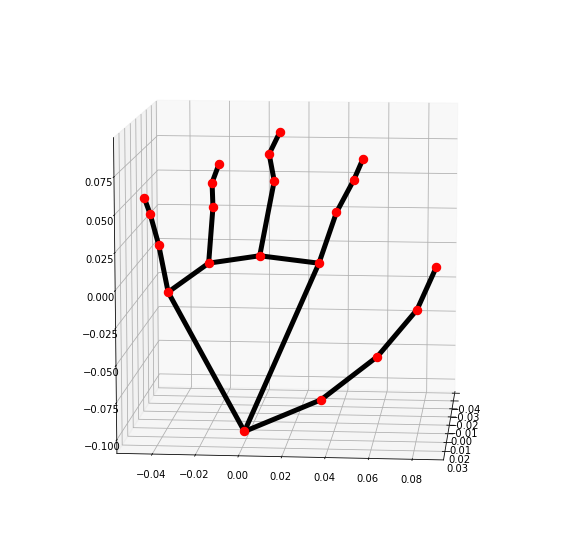

In [98]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
IMAGE_FILES = ['myhand.jpg']
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        'my.hand' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

## homework

In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
file = 'myhand.jpg'
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  image = cv2.flip(cv2.imread(file), 1)
  # Convert the BGR image to RGB before processing.
  results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  # Print handedness and draw hand landmarks on the image.
  print('Handedness:', results.multi_handedness)
  image_height, image_width, _ = image.shape
  annotated_image = image.copy()
  for hand_landmarks in results.multi_hand_landmarks:
    print('hand_landmarks:', hand_landmarks)
    print(
        f'Index finger tip coordinates: (',
        f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
        f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
    )
    mp_drawing.draw_landmarks(
        annotated_image,
        hand_landmarks,
        mp_hands.HAND_CONNECTIONS,
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style())
  cv2.imwrite(
      'my_hand.png', cv2.flip(annotated_image, 1))
  # Draw hand world landmarks.
  for hand_world_landmarks in results.multi_hand_world_landmarks:
    mp_drawing.plot_landmarks(
      hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

im = Image.open('my_hand.png')
im